In [1]:
import numpy as np
import cv2
import os
import glob
import tqdm

gts_path = "/home/re6101029/CVPR2023comp/yolov6/cvpr_infer/gt/seg/*"
preds_path = "/home/re6101029/CVPR2023comp/yolov6/cvpr_infer/output/seg/*"

gts = glob.glob(gts_path)
preds = glob.glob(preds_path)

print("#"*80)

for i in range(len(gts)) :
    gt_img = cv2.imread(gts[i] , cv2.IMREAD_GRAYSCALE)
    pred_img = cv2.imread(preds[i] , cv2.IMREAD_GRAYSCALE)

    num_classes = 20  # 类别的总数

    # 初始化 TP、FP、TN、FN 列表，每个类别一个
    TP = [0] * num_classes
    FP = [0] * num_classes
    TN = [0] * num_classes
    FN = [0] * num_classes

    # 计算 TP、FP、TN、FN
    for class_id in tqdm.tqdm(range(num_classes)):
        for i in range(len(pred_img)):
            for j in range(len(pred_img[0])):
                if pred_img[i][j] == class_id and gt_img[i][j] == class_id:
                    TP[class_id] += 1
                elif pred_img[i][j] == class_id and gt_img[i][j] != class_id:
                    FP[class_id] += 1
                elif pred_img[i][j] != class_id and gt_img[i][j] != class_id:
                    TN[class_id] += 1
                else:
                    FN[class_id] += 1

    # 打印每个类别的 TP、FP、TN、FN
    iou_list = []
    for class_id in range(num_classes):
        # print(f"Class {class_id}:" , f"TP: {TP[class_id]}" , f"FP: {FP[class_id]}" , f"TN: {TN[class_id]}" , f"FN: {FN[class_id]}")
        try :
            iou = TP[class_id] / (TP[class_id] + FP[class_id] + FN[class_id])
        except :
            iou = 0
        iou_list.append(iou)
        print("#"*80)
    
    print(sum(iou_list) / len(iou_list))

################################################################################


100%|██████████| 20/20 [01:12<00:00,  3.63s/it]


################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
############################

100%|██████████| 20/20 [01:12<00:00,  3.63s/it]


################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
############################

100%|██████████| 20/20 [01:12<00:00,  3.65s/it]


################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
############################

100%|██████████| 20/20 [01:12<00:00,  3.63s/it]


################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
############################

100%|██████████| 20/20 [01:12<00:00,  3.62s/it]

################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################
############################

In [2]:
import numpy as np
import torch

def generate_tensor(shape):
    return np.random.rand(*shape).astype(np.float32)

# 產生[8, 192, 40, 40]的tensor
tensor1 = torch.from_numpy(generate_tensor([8, 192, 40, 40]))

# 產生[8, 384, 20, 20]的tensor
tensor2 = torch.from_numpy(generate_tensor([8, 384, 20, 20]))

# 產生[8, 768, 10, 10]的tensor
tensor3 = torch.from_numpy(generate_tensor([8, 768, 10, 10]))

print("Tensor with shape [8, 192, 40, 40]:\n", type(tensor1) , "|" , tensor1.shape)
print("\nTensor with shape [8, 384, 20, 20]:\n", type(tensor2) , "|" , tensor2.shape)
print("\nTensor with shape [8, 768, 10, 10]:\n", type(tensor3) , "|" , tensor3.shape)

tensors = [tensor1 , tensor2 , tensor3]

Tensor with shape [8, 192, 40, 40]:
 <class 'torch.Tensor'> | torch.Size([8, 192, 40, 40])

Tensor with shape [8, 384, 20, 20]:
 <class 'torch.Tensor'> | torch.Size([8, 384, 20, 20])

Tensor with shape [8, 768, 10, 10]:
 <class 'torch.Tensor'> | torch.Size([8, 768, 10, 10])


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 定義三個不同形狀的特徵
features_shapes = [(8, 192, 40, 40), (8, 384, 20, 20), (8, 768, 10, 10)]


# 對每個特徵進行處理
for i , shape in enumerate(features_shapes) :
    # 取得特徵的通道數
    in_channels = shape[1]
    # 設定輸出的特徵通道數為64，你可以根據需求調整
    out_channels = 64
    # 假設你想使用3x3的卷積核，並保持其他參數相同
    kernel_size = 3
    stride = 1
    padding = 1
    
    # 定義 Conv2d
    conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
    relu = nn.ReLU(inplace = True)
    pool = nn.MaxPool2d(kernel_size = (3 , 3))
    # flat = nn.Flatten()
    # linear1 = nn.Linear()
    c_out = conv(tensors[i])
    r_out = relu(c_out)
    p_out = pool(r_out)
    if i == 0 :
        fusion_feat = p_out
    elif i == 1 :
        fusion_feat +=  F.interpolate(p_out , scale_factor = 13/6 , mode = "bilinear" , align_corners = True)
    else :
        fusion_feat +=  F.interpolate(p_out , scale_factor = 13/3 , mode = "bilinear" , align_corners = True)
    
    # f_out = flat(p_out)
    # x = p_out.view(p_out.size(0) , -1)
    print(p_out.shape)
    print(fusion_feat.shape)
    # print(p_out)
    # print(x.shape)
    print("="*100)
    # l1 = linear1(f_out)

    # print(type(out) , "|" , out.shape)
    # 輸出 Conv2d 的參數形狀
    # print("Conv2d parameters for feature shape", shape, ":", conv)
    # print(type(conv))


torch.Size([8, 64, 13, 13])
torch.Size([8, 64, 13, 13])
torch.Size([8, 64, 6, 6])
torch.Size([8, 64, 13, 13])
torch.Size([8, 64, 3, 3])
torch.Size([8, 64, 13, 13])


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
path = "/ssd5/CVPR2023comp/track1_train_data/cls/train.txt"

L = []
with open(path , "r") as f :
    f = f.readlines()
    for t in f :
        L.append(t.strip("\n").split("\t"))
df = pd.DataFrame(L , columns =['img' , 'class']) 

v_counts = df["class"].value_counts()
v_counts.index = v_counts.index.astype(int)
v_counts = v_counts.sort_index()

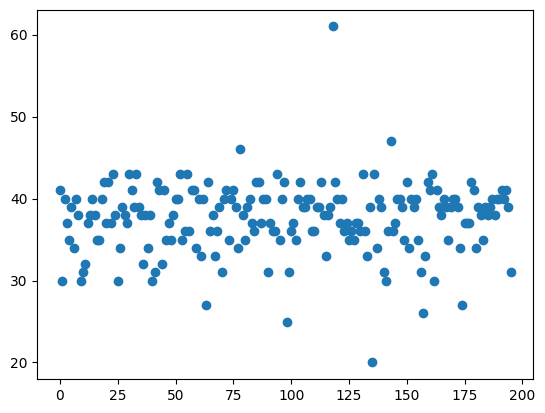

In [28]:
x = v_counts.index
y = v_counts.values

plt.scatter(x , y)
plt.show()